In [1]:
import pandas as pd
import numpy as np
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.kde as kde
import matplotlib.patches as patches
from scipy.stats import norm

In [15]:
df_qpcr= pd.read_excel('../../../../../our_data/qPCR.xlsx', index_col=0)
df_meta = pd.read_excel('../../../../../our_data/meta_data.xlsx', index_col=0)
df_qpcr_meta = pd.merge(df_meta, df_qpcr, left_index=True, right_index=True, how='inner')
df_qpcr_meta.head()

,MiceID,Vendor,Day,Diet,RandomizedGroup,Value
SampleID,,,,,,
sample131,BC1,Beijing,0,Control,C,9.157619e+07
sample132,BC2,Beijing,0,Control,B,1.170283e+08
sample133,BC3,Beijing,0,Control,A,5.842790e+07
sample134,BC4,Beijing,0,Control,D,2.131828e+08
sample135,BC5,Beijing,0,Control,E,8.844480e+07


In [16]:
df_16S_abs = pd.read_excel('../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)
df_16S_abs_meta = pd.merge(df_meta, df_16S_abs, left_index=True, right_index=True, how='inner')
df_16S_abs_meta.head()

,MiceID,Vendor,Day,Diet,RandomizedGroup,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,BC1,Beijing,0,Control,C,0.0,108301.701888,7101.750943,0.0,0.0,...,0.0,63028.039623,0.0,0.0,0.0,165115.709436,0.0,0.0,0.0,1.322701e+05
sample132,BC2,Beijing,0,Control,B,0.0,405068.034693,50064.588558,0.0,0.0,...,0.0,80103.341692,0.0,0.0,0.0,106501.033841,0.0,0.0,0.0,1.003112e+06
sample133,BC3,Beijing,0,Control,A,0.0,36169.603950,45332.570284,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,221840.237562,0.0,0.0,0.0,1.866352e+05
sample134,BC4,Beijing,0,Control,D,0.0,484302.054587,10150.043060,0.0,0.0,...,0.0,105850.449056,0.0,0.0,0.0,919303.900024,0.0,0.0,0.0,8.714537e+05
sample135,BC5,Beijing,0,Control,E,0.0,91489.970533,42374.302141,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,581683.602124,0.0,0.0,0.0,5.335310e+05


In [17]:
df_16S_rel = pd.read_excel('../../../../../our_data/16S_relative_abundance.xlsx', index_col=0)
df_16S_rel_meta = pd.merge(df_meta, df_16S_rel, left_index=True, right_index=True, how='inner')
df_16S_rel_meta.head()

,MiceID,Vendor,Day,Diet,RandomizedGroup,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,BC1,Beijing,0,Control,C,0.0,0.001183,0.000078,0.0,0.0,...,0.0,0.000688,0.0,0.0,0.0,0.001803,0.0,0.0,0.0,0.001444
sample132,BC2,Beijing,0,Control,B,0.0,0.003461,0.000428,0.0,0.0,...,0.0,0.000684,0.0,0.0,0.0,0.000910,0.0,0.0,0.0,0.008572
sample133,BC3,Beijing,0,Control,A,0.0,0.000619,0.000776,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.003797,0.0,0.0,0.0,0.003194
sample134,BC4,Beijing,0,Control,D,0.0,0.002272,0.000048,0.0,0.0,...,0.0,0.000497,0.0,0.0,0.0,0.004312,0.0,0.0,0.0,0.004088
sample135,BC5,Beijing,0,Control,E,0.0,0.001034,0.000479,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.006577,0.0,0.0,0.0,0.006032


In [18]:
def hpd_grid(sample, alpha=0.05, roundto=2):
    """Calculate highest posterior density (HPD) of array for given alpha. 
    The HPD is the minimum width Bayesian credible interval (BCI). 
    The function works for multimodal distributions, returning more than one mode
    Parameters
    ----------
    
    sample : Numpy array or python list
        An array containing MCMC samples
    alpha : float
        Desired probability of type I error (defaults to 0.05)
    roundto: integer
        Number of digits after the decimal point for the results
    Returns
    ----------
    hpd: array with the lower 
          
    """
    sample = np.asarray(sample)
    sample = sample[~np.isnan(sample)]
    # get upper and lower bounds
    l = np.min(sample)
    u = np.max(sample)
    density = kde.gaussian_kde(sample)
    x = np.linspace(l, u, 2000)
    y = density.evaluate(x)
    #y = density.evaluate(x, l, u) waitting for PR to be accepted
    xy_zipped = zip(x, y/np.sum(y))
    xy = sorted(xy_zipped, key=lambda x: x[1], reverse=True)
    xy_cum_sum = 0
    hdv = []
    for val in xy:
        xy_cum_sum += val[1]
        hdv.append(val[0])
        if xy_cum_sum >= (1-alpha):
            break
    hdv.sort()
    diff = (u-l)/20  # differences of 5%
    hpd = []
    hpd.append(round(min(hdv), roundto))
    for i in range(1, len(hdv)):
        if hdv[i]-hdv[i-1] >= diff:
            hpd.append(round(hdv[i-1], roundto))
            hpd.append(round(hdv[i], roundto))
    hpd.append(round(max(hdv), roundto))
    ite = iter(hpd)
    hpd = list(zip(ite, ite))
    modes = []
    for value in hpd:
        x_hpd = x[(x > value[0]) & (x < value[1])]
        y_hpd = y[(x > value[0]) & (x < value[1])]
        modes.append(round(x_hpd[np.argmax(y_hpd)], roundto))
    return hpd, x, y, modes

In [19]:
fit = az.from_cmdstan(["output_%d.csv"%(i) for i in np.arange(1,4)])

/Users/liaoc/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:148: UserWarning: More chains (3) than draws (0). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/Users/liaoc/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:148: UserWarning: More chains (3) than draws (0). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


# Absolute abundance

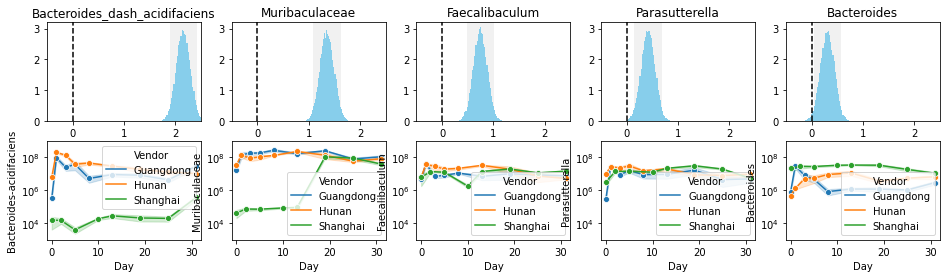

In [11]:
fig, ax = plt.subplots(figsize=(16,4), nrows=2, ncols=5)

inulin_responders = ['Bacteroides_dash_acidifaciens','Muribaculaceae','Faecalibaculum','Parasutterella','Bacteroides']
for k,c in enumerate(inulin_responders):
    var = 'epsilon__%s'%(c)
    data = []
    for i in np.arange(0,3):
        data.extend(list(fit.posterior[var][i].values))
    hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(data)
    assert len(hpd_mu) == 1
    (x0, x1) = hpd_mu[0]
    rect = patches.Rectangle((x0,0),x1-x0,3.2,linewidth=1,edgecolor=None,facecolor='lightgray',alpha=0.3)
    _ = ax[0,k].add_patch(rect)
    ax[0,k].hist(data, bins=50, density=True, color='skyblue')
    ax[0,k].plot([0,0],[0,3.2],'k--')
    ax[0,k].set_title(c)
    ax[0,k].set_ylim([0,3.2])
    ax[0,k].set_xlim([-0.5,2.5])
    
df_16S_abs_meta = df_16S_abs_meta[(df_16S_abs_meta.Diet=='Inulin') & (df_16S_abs_meta.Vendor!='Beijing')]
for k,c in enumerate(inulin_responders):
    sns.lineplot(x='Day',y=c.replace('_dash_','-'), marker='o', hue='Vendor', ci=68, data=df_16S_abs_meta, ax=ax[1,k])
    ax[1,k].set_yscale(('log'))
    ax[1,k].set_xlim([-1,32])
    ax[1,k].set_ylim([1e3,1e9])

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("bayesian_inference_inulin_responder_abs.svg", format="svg")

# Relative abundance

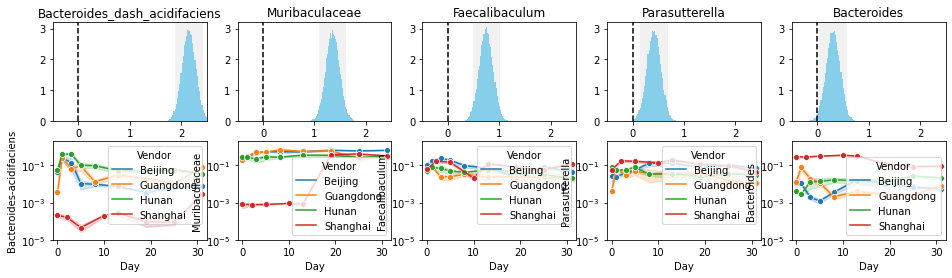

In [20]:
fig, ax = plt.subplots(figsize=(16,4), nrows=2, ncols=5)

inulin_responders = ['Bacteroides_dash_acidifaciens','Muribaculaceae','Faecalibaculum','Parasutterella','Bacteroides']
for k,c in enumerate(inulin_responders):
    var = 'epsilon__%s'%(c)
    data = []
    for i in np.arange(0,3):
        data.extend(list(fit.posterior[var][i].values))
    hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(data)
    assert len(hpd_mu) == 1
    (x0, x1) = hpd_mu[0]
    rect = patches.Rectangle((x0,0),x1-x0,3.2,linewidth=1,edgecolor=None,facecolor='lightgray',alpha=0.3)
    _ = ax[0,k].add_patch(rect)
    ax[0,k].hist(data, bins=50, density=True, color='skyblue')
    ax[0,k].plot([0,0],[0,3.2],'k--')
    ax[0,k].set_title(c)
    ax[0,k].set_ylim([0,3.2])
    ax[0,k].set_xlim([-0.5,2.5])
    
df_16S_rel_meta = df_16S_rel_meta[df_16S_rel_meta.Diet=='Inulin']
for k,c in enumerate(inulin_responders):
    sns.lineplot(x='Day',y=c.replace('_dash_','-'), marker='o', hue='Vendor', ci=68, data=df_16S_rel_meta, ax=ax[1,k])
    ax[1,k].set_xlim([-1,32])
    ax[1,k].set_ylim([1e-5,2])
    ax[1,k].set_yscale('log')

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("bayesian_inference_inulin_responder_rel.svg", format="svg")

# qPCR

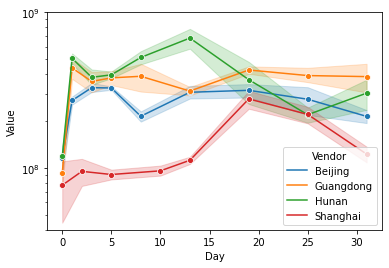

In [11]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1, ncols=1)
curr_df = df_qpcr_meta[df_qpcr_meta.Diet=='Inulin']
sns.lineplot(x='Day',y='Value', marker='o', hue='Vendor', ci=68, data=curr_df, ax=ax)
ax.set_yscale(('log'))
_ = ax.set_ylim([4e7,1e9])
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("qpcr_vendor_time_series.svg", format="svg")

# Plot posterior distribution

In [3]:
fit = az.from_cmdstan(["output_%d.csv"%(i) for i in np.arange(1,4)])

/Users/liaoc/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:148: UserWarning: More chains (3) than draws (0). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/Users/liaoc/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:148: UserWarning: More chains (3) than draws (0). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


In [4]:
df_stan_output_summary

,Type,Taxa,Left,Right,Middle,SNR,Significant
0,inulin_response,Muribaculaceae,1.08,1.62,1.350,9.958040,True
1,inulin_response,Bacteroides_dash_acidifaciens,1.89,2.42,2.155,15.846923,True
2,inulin_response,Faecalibaculum,0.48,1.01,0.745,5.506163,True
3,inulin_response,Parasutterella,0.14,0.68,0.410,3.039780,True
4,inulin_response,Bacteroides,0.04,0.58,0.310,2.265775,True
5,pairwise_interaction,"('Muribaculaceae', 'Muribaculaceae')",-1.59,-0.29,-0.940,-2.864951,True
6,pairwise_interaction,"('Muribaculaceae', 'Bacteroides_dash_acidifaci...",0.23,2.31,1.270,2.392931,True
7,pairwise_interaction,"('Muribaculaceae', 'Desulfovibrionaceae')",0.27,3.71,1.990,2.280134,True
8,pairwise_interaction,"('Muribaculaceae', 'Clostridia_dash_UCG_dash_0...",-3.74,-0.06,-1.900,-2.016358,True
9,pairwise_interaction,"('Bacteroides_dash_acidifaciens', 'Muribaculac...",-3.81,-2.50,-3.155,-9.603366,True


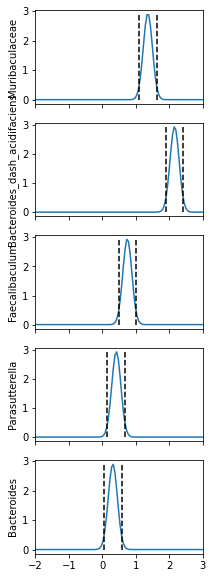

In [12]:
df_stan_output_summary = pd.read_excel('bayesian_regression_summary_top20.xlsx', index_col=0)
df_stan_output_summary = df_stan_output_summary[df_stan_output_summary.Significant==True].reset_index(drop=True)
df_stan_output_summary = df_stan_output_summary[df_stan_output_summary.Type=='inulin_response']

fig, ax = plt.subplots(figsize=(3,10), nrows=len(df_stan_output_summary.index), ncols=1, sharex=True)

for idx in df_stan_output_summary.index:
    _type = df_stan_output_summary.loc[idx,'Type']
    _taxa = df_stan_output_summary.loc[idx,'Taxa']
    _left = df_stan_output_summary.loc[idx,'Left']
    _middle = df_stan_output_summary.loc[idx,'Middle']
    _right = df_stan_output_summary.loc[idx,'Right']
    if _type == 'inulin_response':
        var = 'epsilon__%s'%(_taxa)
    if _type == 'pairwise_interaction':
        var = 'beta__%s_%s'%(eval(_taxa)[0],eval(_taxa)[1])
    data = []
    for i in np.arange(0,3):
        data.extend(list(fit.posterior[var][i].values))
    mean,std=norm.fit(data)
    x = np.linspace(-2, 3, 100)
    ax[idx].set_xlim([-2,3])
    y = norm.pdf(x, mean, std)
    ax[idx].plot(x,y)
    ax[idx].plot([_left,_left],[0,np.max(y)], 'k--')
    ax[idx].plot([_right,_right],[0,np.max(y)], 'k--')
    ax[idx].set_ylabel(_taxa)
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("bayesian_inference_gLV.svg", format="svg")